In [61]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import initializers as init

print(tf.__version__)

2.1.0


In [62]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

print(train_data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


In [63]:
train_data.iloc[0:4,[0,1,2,3,-3,-2,-1]]

,Id,MSSubClass,MSZoning,LotFrontage,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,WD,Normal,208500
1,2,20,RL,80.0,WD,Normal,181500
2,3,60,RL,68.0,WD,Normal,223500
3,4,70,RL,60.0,WD,Abnorml,140000


In [64]:
all_features = pd.concat((train_data.iloc[:, 1:-1], test_data.iloc[:, 1:]))

In [65]:
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index
# 数据标准化
all_features[numeric_features] = all_features[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))
# 用0来填充缺失值
all_features = all_features.fillna(0)
all_features.shape

(2919, 79)

In [66]:
all_features = pd.get_dummies(all_features,dummy_na=True)
all_features.shape

(2919, 354)

In [67]:
n_train = train_data.shape[0]
train_features = np.array(all_features[:n_train].values,dtype=np.float)
test_features = np.array(all_features[n_train:].values,dtype=np.float)
train_labels = np.array(train_data.SalePrice.values.reshape(-1, 1),dtype=np.float)

In [68]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1024,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(1))


In [69]:
model.compile(optimizer='adam',loss=tf.keras.losses.mean_squared_logarithmic_error,metrics=['acc'])
model.fit(train_features,train_labels,epochs=5,validation_split=0.2)

Train on 1168 samples, validate on 292 samples
Epoch 1/5
1168/1168 [==============================] - 1s 606us/sample - loss: 74.2742 - acc: 0.0000e+00 - val_loss: 47.4786 - val_acc: 0.0000e+00
Epoch 2/5
1168/1168 [==============================] - 0s 169us/sample - loss: 38.9854 - acc: 0.0000e+00 - val_loss: 32.5380 - val_acc: 0.0000e+00
Epoch 3/5
1168/1168 [==============================] - 0s 143us/sample - loss: 28.5323 - acc: 0.0000e+00 - val_loss: 25.2021 - val_acc: 0.0000e+00

In [70]:
print(model.history.history['acc'])
print(model.history.history['val_acc'])

[0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0]


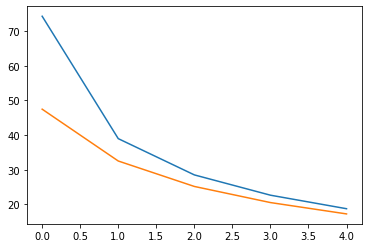

In [71]:
plt.plot(model.history.history['loss'],label='train')
plt.plot(model.history.history['val_loss'],label='test')
